In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:

import logging
import os
import pickle
from glob import glob

def load_mariel_raw(pattern="data/mariel_*.npy"):
    """Load six datasets and perform minimal preprocessing.

    Processing amunts to center each dancer, such that
    the barycenter becomes 0.

    From Pettee 2019:
    Each frame of the dataset is transformed such that the
    overall average (x,y) position per frame is centered at
    the same point and scaled such that all of the coordinates
    fit within the unit cube.
    """
    datasets = {}
    ds_all = []

    exclude_points = [26, 53]
    point_mask = np.ones(55, dtype=bool)
    point_mask[exclude_points] = 0

    logging.info("Loading raw datasets:")
    for f in sorted(glob(pattern)):
        ds_name = os.path.basename(f)[7:-4]
        ds = np.load(f).transpose((1, 0, 2))
        ds = ds[500:-500, point_mask]
        logging.info(f"- {f} of shape {ds.shape}")

        ds[:, :, 2] *= -1
        # ds = filter_points(ds)

        datasets[ds_name] = ds
        ds_all.append(ds)

    ds_counts = np.array([ds.shape[0] for ds in ds_all])
    ds_offsets = np.zeros_like(ds_counts)
    ds_offsets[1:] = np.cumsum(ds_counts[:-1])

    ds_all = np.concatenate(ds_all)

    low, hi = np.quantile(ds_all, [0.01, 0.99], axis=(0, 1))
    xy_min = min(low[:2])
    xy_max = max(hi[:2])
    xy_range = xy_max - xy_min
    ds_all[:, :, :2] -= xy_min
    ds_all *= 2 / xy_range
    ds_all[:, :, :2] -= 1.0

    # it's also useful to have these datasets centered,
    # i.e. with the x and y offsets
    # subtracted from each individual frame

    ds_all_centered = ds_all.copy()
    ds_all_centered[:, :, :2] -= ds_all_centered[:, :, :2].mean(axis=1, keepdims=True)

    datasets_centered = {}
    for ds in datasets:
        datasets[ds][:, :, :2] -= xy_min
        datasets[ds] *= 2 / xy_range
        datasets[ds][:, :, :2] -= 1.0
        datasets_centered[ds] = datasets[ds].copy()
        datasets_centered[ds][:, :, :2] -= datasets[ds][:, :, :2].mean(
            axis=1, keepdims=True
        )

    low, hi = np.quantile(ds_all, [0.01, 0.99], axis=(0, 1))
    return ds_all, ds_all_centered, datasets, datasets_centered, ds_counts

In [8]:
ds_all, ds_all_centered, _, _, _ = load_mariel_raw()
pose_data = ds_all_centered.reshape((ds_all.shape[0], -1))

In [9]:
print(pose_data.shape)

(38309, 159)


In [15]:
pose_data[0]

array([-0.05188609,  0.20164581,  0.24751503, -0.01699805,  0.08975039,
        0.25119249, -0.00388664,  0.08711654,  0.17110871,  0.19051095,
       -0.05916478,  0.05245764, -0.02073609,  0.15750026,  0.25152354,
        0.04156951,  0.12206756,  0.23592946,  0.08116827, -0.0381786 ,
        0.2388818 ,  0.02873957,  0.11097545,  0.10089207, -0.00045154,
        0.20566443,  0.23175354,  0.01046035,  0.11083446,  0.06335681,
        0.01864126,  0.12144008,  0.18391637,  0.10589385, -0.01518018,
        0.18812494,  0.17291316, -0.09043159,  0.0563794 ,  0.00570556,
        0.07262767,  0.10950264, -0.0248498 ,  0.11860811,  0.01159426,
       -0.02977732,  0.08831724,  0.02119496,  0.17881402,  0.07064791,
        0.12312045,  0.13440726,  0.07265151,  0.09368184,  0.1613274 ,
       -0.0260098 ,  0.01516635,  0.19750747, -0.0304813 ,  0.01305038,
        0.0043743 ,  0.11166746,  0.00563679,  0.01067376,  0.0870072 ,
        0.01598083,  0.18833679, -0.01730936,  0.08484483,  0.14

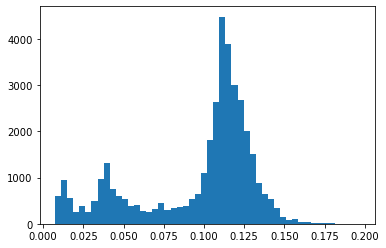

In [14]:
plt.hist(pose_data.mean(axis=-1), bins=50);

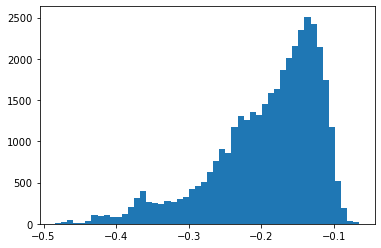

In [17]:
plt.hist(pose_data.min(axis=-1), bins=50);

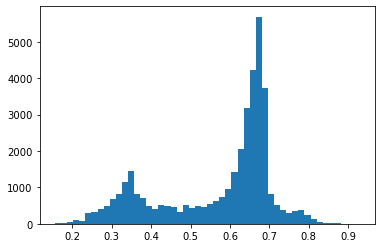

In [18]:
plt.hist(pose_data.max(axis=-1), bins=50);

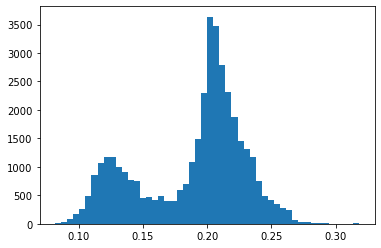

In [16]:
plt.hist(pose_data.std(axis=-1), bins=50);